# How to use paramManager
paramManager writes and reads parameter files for data file sets, one structured parameter dictionary per data file.

In [1]:
import numpy as np
import librosa # conda install -c conda-forge librosa
import librosa.display

import os  # for mkdir
from os import listdir
from os.path import isfile, join

%matplotlib inline
import matplotlib.pyplot as plt

##-----------   paramManager  interface   ------------------##
from paramManager import paramManager

In [2]:
datapath='..\dataset'
parampath='..\dataparam' 
# print the files (but not the directories) in datapath
[f for f in os.listdir(datapath) if os.path.isfile(os.path.join(datapath, f))]

['brass_acoustic_018-070-127.wav',
 'brass_acoustic_018-071-127.wav',
 'brass_acoustic_018-072-127.wav',
 'brass_acoustic_018-073-127.wav',
 'brass_acoustic_018-074-127.wav',
 'brass_acoustic_018-075-127.wav',
 'brass_acoustic_018-076-127.wav',
 'brass_acoustic_018-077-127.wav',
 'brass_acoustic_018-078-127.wav',
 'brass_acoustic_018-079-127.wav',
 'reed_acoustic_000-070-127.wav',
 'reed_acoustic_000-071-127.wav',
 'reed_acoustic_000-072-127.wav',
 'reed_acoustic_000-073-127.wav',
 'reed_acoustic_000-074-127.wav',
 'reed_acoustic_000-075-127.wav',
 'reed_acoustic_000-076-127.wav',
 'reed_acoustic_000-077-127.wav',
 'reed_acoustic_000-078-127.wav',
 'reed_acoustic_000-079-127.wav']

In [3]:
# paramManager, create 
pm=paramManager(datapath, parampath)  ##-----------   paramManager  interface ------------------##

In [4]:
# initialize parameter files for the data (only necessary if they don't already exist)
# The boolean parameter tells whether to overwrite current parameter directory (default is False)
pm.initParamFiles(overwrite=True) ##-----------   paramManager  interface ------------------##

In [5]:
# paramManager , check that data files and paramfiles match in number and name
pm.checkIntegrity() ##-----------   paramManager  interface   ------------------##

True

In [6]:
# param Manager , get the parameter dictionary for a file 
# This is the critical function for getting parameters for training nets. 

##-----------   paramManager  interface   ------------------##
foo=pm.getParams(datapath + '/' + 'reed_acoustic_000-072-127.wav') #the path and extension are optional
foo

{'meta': {'filename': 'reed_acoustic_000-072-127.wav'}}

# First a little essentia demo

In [ ]:
# http://essentia.upf.edu/documentation/documentation.html
import essentia # conda install -c thomasfillon essentia
import essentia.standard


In [ ]:
testfile = datapath + '/' + 'reed_acoustic_000-072-127.wav'

loader = essentia.standard.AudioLoader(filename=testfile) #Monoloader doesn't get metadata

# and then we actually perform the loading:
(audio, sr,chans,_,_,_) = loader()
print("shape of audio is  is {}".format(audio.shape))
print("chans is {}".format(chans))
print("audio is {}".format(audio))
audio=audio[:,0] #get (the) one (and only) channel

import IPython
IPython.display.Audio(testfile)


In [ ]:
PitchMelodia = essentia.standard.PitchMelodia( binResolution=2, sampleRate=sr, guessUnvoiced=True) # donothing??: , minFrequency=10, maxFrequency=200)
p, pc = PitchMelodia(audio )
pitch_times = np.linspace(0.0,len(audio)/sr,len(p) )
plt.figure()
plt.title("Pitch:")
plt.plot(pitch_times,p)

# paramManager - analyze data files to create a new parameter with Essentia

In [ ]:
# Get a list of data file names so we can pass them to essentia for analysis
for fname in pm.getFullPathNames(datapath) :
    print("processing {}".format(fname))
    loader = essentia.standard.AudioLoader(filename=fname) #Monoloader doesn't get metadata
    (audio, sr,chans,_,_,_) = loader()
    audio=audio[:,0] #get (the) one (and only) channel
    
    PitchMelodia = essentia.standard.PitchMelodia( binResolution=2, sampleRate=sr, guessUnvoiced=True) # donothing??: , minFrequency=10, maxFrequency=200)
    p, pc = PitchMelodia(audio )
    
    # Need time points for the parameter file, which essentia does not provide
    pitch_times = np.linspace(0.0,len(audio)/sr,len(p) )
    if (not (len(p) == len(pitch_times))) :
        print("Warning, num parameters not equal to time points")
    
    # Now add the data to the parameter file
    ##-----------   paramManager  interface   ------------------##
    pm.addParam(fname, "pitch", pitch_times, p, units="frequency", nvals=0, minval=0, maxval=1)
    
    

In [ ]:
len(audio)/sr

In [ ]:
# Here we show how to get a particular parameater from the pdict for a datafile
##-----------   paramManager  interface   ------------------##
fooparams=pm.getParams(datapath + '/' + 'reed_acoustic_000-072-127.wav')
foopitch=fooparams['pitch']

#now just show that it looks the same as the essential data 
title=fooparams['meta']['filename']
plt.figure()
plt.title(title)
plt.plot(foopitch['times'], foopitch['values'])

# Librosa demo

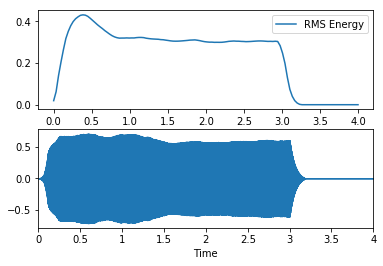

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

sig,sr=librosa.core.load(datapath + "/" + "reed_acoustic_000-072-127.wav", sr=None)
rmse=librosa.feature.rmse(y=sig)[0]
rmse_times = np.linspace(0.0,len(sig)/sr, len(rmse) )

plt.figure()
plt.subplot(2, 1, 1)
#plt.semilogy(rmse.T, label='RMS Energy')
plt.plot(rmse_times, rmse, label='RMS Energy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
librosa.display.waveplot(sig, sr=16000)

# paramManager - analyze data files to create a new parameter with LibRosa 

In [8]:
# Get a list of data file names so we can pass them to essentia for analysis
for fname in pm.getFullPathNames(datapath) :
    print("processing {}".format(fname))

    sig,sr=librosa.core.load(fname, sr=None)
    rmse=librosa.feature.rmse(y=sig)[0]
    rmse_times = np.linspace(0.0,len(sig)/sr, len(rmse) )
    
    # Now add the data to the parameter file
    ##-----------   paramManager  interface   ------------------##
    pm.addParam(fname, "rmse", rmse_times, rmse, units="energy", nvals=0, minval=0, maxval=None)
    

processing ..\dataset/brass_acoustic_018-070-127.wav
processing ..\dataset/brass_acoustic_018-071-127.wav
processing ..\dataset/brass_acoustic_018-072-127.wav
processing ..\dataset/brass_acoustic_018-073-127.wav
processing ..\dataset/brass_acoustic_018-074-127.wav
processing ..\dataset/brass_acoustic_018-075-127.wav
processing ..\dataset/brass_acoustic_018-076-127.wav
processing ..\dataset/brass_acoustic_018-077-127.wav
processing ..\dataset/brass_acoustic_018-078-127.wav
processing ..\dataset/brass_acoustic_018-079-127.wav
processing ..\dataset/reed_acoustic_000-070-127.wav
processing ..\dataset/reed_acoustic_000-071-127.wav
processing ..\dataset/reed_acoustic_000-072-127.wav
processing ..\dataset/reed_acoustic_000-073-127.wav
processing ..\dataset/reed_acoustic_000-074-127.wav
processing ..\dataset/reed_acoustic_000-075-127.wav
processing ..\dataset/reed_acoustic_000-076-127.wav
processing ..\dataset/reed_acoustic_000-077-127.wav
processing ..\dataset/reed_acoustic_000-078-127.wav
pr

# paramManager, add params from info stored in filenames

In [9]:
import re

for fname in pm.getFullPathNames(datapath) :
    print("processing {}".format(fname))
    
    # first, instrument ID
    if fname.find("brass") >=0 : 
        instID=0
    else : 
        instID=1
    print("    {} is in category {}".format(fname, 1))
            
    ##-----------   paramManager  interface   ------------------##
    pm.addParam(fname, "instID", [0.0,4.0], [instID,instID], units="category", nvals=2, minval=0, maxval=1)
    

    #now midiPitch
    n=re.findall(r'(?<=-).*?(?=-)', fname)[0] #3-digit pitch number wedged between dashes (-) in name
    if (n[0]=='0') :
        midinum=int(n[1:])
    else :
        midinum=int(n)
    print("    midi number is {}".format(midinum))
    
    ##-----------   paramManager  interface   ------------------##
    pm.addParam(fname, "midiPitch", [0.0,4.0], [midinum,midinum], units="midiPitch", nvals=128, minval=0, maxval=127)
    

processing ..\dataset/brass_acoustic_018-070-127.wav
    ..\dataset/brass_acoustic_018-070-127.wav is in category 1
    midi number is 70
processing ..\dataset/brass_acoustic_018-071-127.wav
    ..\dataset/brass_acoustic_018-071-127.wav is in category 1
    midi number is 71
processing ..\dataset/brass_acoustic_018-072-127.wav
    ..\dataset/brass_acoustic_018-072-127.wav is in category 1
    midi number is 72
processing ..\dataset/brass_acoustic_018-073-127.wav
    ..\dataset/brass_acoustic_018-073-127.wav is in category 1
    midi number is 73
processing ..\dataset/brass_acoustic_018-074-127.wav
    ..\dataset/brass_acoustic_018-074-127.wav is in category 1
    midi number is 74
processing ..\dataset/brass_acoustic_018-075-127.wav
    ..\dataset/brass_acoustic_018-075-127.wav is in category 1
    midi number is 75
processing ..\dataset/brass_acoustic_018-076-127.wav
    ..\dataset/brass_acoustic_018-076-127.wav is in category 1
    midi number is 76
processing ..\dataset/brass_acoust

In [10]:

# Now lets have a look at one of our paramfiles
foo=pm.getParams(datapath + '/' + 'reed_acoustic_000-072-127.wav') #the path and extension are optional
foo

{'meta': {'filename': 'reed_acoustic_000-072-127.wav'},
 'rmse': {'times': [0.0,
   0.032,
   0.064,
   0.096,
   0.128,
   0.16,
   0.192,
   0.224,
   0.256,
   0.28800000000000003,
   0.32,
   0.352,
   0.384,
   0.41600000000000004,
   0.448,
   0.48,
   0.512,
   0.544,
   0.5760000000000001,
   0.608,
   0.64,
   0.672,
   0.704,
   0.736,
   0.768,
   0.8,
   0.8320000000000001,
   0.864,
   0.896,
   0.928,
   0.96,
   0.992,
   1.024,
   1.056,
   1.088,
   1.12,
   1.1520000000000001,
   1.184,
   1.216,
   1.248,
   1.28,
   1.312,
   1.344,
   1.3760000000000001,
   1.408,
   1.44,
   1.472,
   1.504,
   1.536,
   1.568,
   1.6,
   1.6320000000000001,
   1.6640000000000001,
   1.696,
   1.728,
   1.76,
   1.792,
   1.824,
   1.856,
   1.8880000000000001,
   1.92,
   1.952,
   1.984,
   2.016,
   2.048,
   2.08,
   2.112,
   2.144,
   2.176,
   2.208,
   2.24,
   2.2720000000000002,
   2.3040000000000003,
   2.336,
   2.368,
   2.4,
   2.432,
   2.464,
   2.496,
   2.528,
  

### resampling (interpolation) demo

In [11]:
#sometimes we need parameter values at a different sampling rate
#for example we have a section of data made up of 6 samples, taken from 0.0s to 0.03s of reed_acoustic_000-072-127.wav
#but there are only 2 rmse (parameter) values associated with this duration
#to get a rmse (parameter) for each of our 6 samples, load the parameter file using getParams then pass it to resampleParam as follows:

pm.resampleParam(foo,"rmse",6,0.0,0.03,verbose=True)

#this function uses scipy's linear interpolation method

--Data resampled from--
times: [0.0, 0.032, 0.064, 0.096, 0.128, 0.16, 0.192, 0.224, 0.256, 0.28800000000000003, 0.32, 0.352, 0.384, 0.41600000000000004, 0.448, 0.48, 0.512, 0.544, 0.5760000000000001, 0.608, 0.64, 0.672, 0.704, 0.736, 0.768, 0.8, 0.8320000000000001, 0.864, 0.896, 0.928, 0.96, 0.992, 1.024, 1.056, 1.088, 1.12, 1.1520000000000001, 1.184, 1.216, 1.248, 1.28, 1.312, 1.344, 1.3760000000000001, 1.408, 1.44, 1.472, 1.504, 1.536, 1.568, 1.6, 1.6320000000000001, 1.6640000000000001, 1.696, 1.728, 1.76, 1.792, 1.824, 1.856, 1.8880000000000001, 1.92, 1.952, 1.984, 2.016, 2.048, 2.08, 2.112, 2.144, 2.176, 2.208, 2.24, 2.2720000000000002, 2.3040000000000003, 2.336, 2.368, 2.4, 2.432, 2.464, 2.496, 2.528, 2.56, 2.592, 2.624, 2.656, 2.688, 2.72, 2.7520000000000002, 2.7840000000000003, 2.816, 2.848, 2.88, 2.912, 2.944, 2.976, 3.008, 3.04, 3.072, 3.104, 3.136, 3.168, 3.2, 3.232, 3.2640000000000002, 3.2960000000000003, 3.3280000000000003, 3.36, 3.392, 3.424, 3.456, 3.488, 3.52, 3.552, 3.

In [12]:
#the default behaviour of resampleParam is not to overwrite the original param file

foo=pm.getParams(datapath + '/' + 'reed_acoustic_000-072-127.wav')
foo

{'meta': {'filename': 'reed_acoustic_000-072-127.wav'},
 'rmse': {'times': [0.0,
   0.032,
   0.064,
   0.096,
   0.128,
   0.16,
   0.192,
   0.224,
   0.256,
   0.28800000000000003,
   0.32,
   0.352,
   0.384,
   0.41600000000000004,
   0.448,
   0.48,
   0.512,
   0.544,
   0.5760000000000001,
   0.608,
   0.64,
   0.672,
   0.704,
   0.736,
   0.768,
   0.8,
   0.8320000000000001,
   0.864,
   0.896,
   0.928,
   0.96,
   0.992,
   1.024,
   1.056,
   1.088,
   1.12,
   1.1520000000000001,
   1.184,
   1.216,
   1.248,
   1.28,
   1.312,
   1.344,
   1.3760000000000001,
   1.408,
   1.44,
   1.472,
   1.504,
   1.536,
   1.568,
   1.6,
   1.6320000000000001,
   1.6640000000000001,
   1.696,
   1.728,
   1.76,
   1.792,
   1.824,
   1.856,
   1.8880000000000001,
   1.92,
   1.952,
   1.984,
   2.016,
   2.048,
   2.08,
   2.112,
   2.144,
   2.176,
   2.208,
   2.24,
   2.2720000000000002,
   2.3040000000000003,
   2.336,
   2.368,
   2.4,
   2.432,
   2.464,
   2.496,
   2.528,
  

In [13]:
#but this can be changed if overwrite=True

pm.resampleParam(foo, "rmse",10,0.15,0.25,verbose=True,overwrite=True)
foo=pm.getParams(datapath + '/' + 'reed_acoustic_000-072-127.wav')
foo

--Data resampled from--
times: [0.0, 0.032, 0.064, 0.096, 0.128, 0.16, 0.192, 0.224, 0.256, 0.28800000000000003, 0.32, 0.352, 0.384, 0.41600000000000004, 0.448, 0.48, 0.512, 0.544, 0.5760000000000001, 0.608, 0.64, 0.672, 0.704, 0.736, 0.768, 0.8, 0.8320000000000001, 0.864, 0.896, 0.928, 0.96, 0.992, 1.024, 1.056, 1.088, 1.12, 1.1520000000000001, 1.184, 1.216, 1.248, 1.28, 1.312, 1.344, 1.3760000000000001, 1.408, 1.44, 1.472, 1.504, 1.536, 1.568, 1.6, 1.6320000000000001, 1.6640000000000001, 1.696, 1.728, 1.76, 1.792, 1.824, 1.856, 1.8880000000000001, 1.92, 1.952, 1.984, 2.016, 2.048, 2.08, 2.112, 2.144, 2.176, 2.208, 2.24, 2.2720000000000002, 2.3040000000000003, 2.336, 2.368, 2.4, 2.432, 2.464, 2.496, 2.528, 2.56, 2.592, 2.624, 2.656, 2.688, 2.72, 2.7520000000000002, 2.7840000000000003, 2.816, 2.848, 2.88, 2.912, 2.944, 2.976, 3.008, 3.04, 3.072, 3.104, 3.136, 3.168, 3.2, 3.232, 3.2640000000000002, 3.2960000000000003, 3.3280000000000003, 3.36, 3.392, 3.424, 3.456, 3.488, 3.52, 3.552, 3.

{'meta': {'filename': 'reed_acoustic_000-072-127.wav'},
 'rmse': {'times': [0.15,
   0.1611111111111111,
   0.17222222222222222,
   0.18333333333333332,
   0.19444444444444445,
   0.20555555555555555,
   0.21666666666666667,
   0.22777777777777777,
   0.23888888888888887,
   0.25],
  'values': [0.3000255599617958,
   0.31794319632980556,
   0.32997509754366344,
   0.3420069987575213,
   0.35343955063985455,
   0.3627471367104186,
   0.37205472278098267,
   0.3805462639364931,
   0.38745371790395844,
   0.3943611718714237],
  'units': 'energy',
  'nvals': 0,
  'minval': 0,
  'maxval': None},
 'instID': {'times': [0.0, 4.0],
  'values': [1, 1],
  'units': 'category',
  'nvals': 2,
  'minval': 0,
  'maxval': 1},
 'midiPitch': {'times': [0.0, 4.0],
  'values': [72, 72],
  'units': 'midiPitch',
  'nvals': 128,
  'minval': 0,
  'maxval': 127}}

In [12]:
#instead of resampling 1 parameter at a time, use resampleAllParams to automatically interpolate all of them (will ignore meta)

paramdict = pm.resampleAllParams(foo,5,1.1,1.2,verbose=True)

rmse
--Data resampled from--
times: [0.0, 0.032, 0.064, 0.096, 0.128, 0.16, 0.192, 0.224, 0.256, 0.28800000000000003, 0.32, 0.352, 0.384, 0.41600000000000004, 0.448, 0.48, 0.512, 0.544, 0.5760000000000001, 0.608, 0.64, 0.672, 0.704, 0.736, 0.768, 0.8, 0.8320000000000001, 0.864, 0.896, 0.928, 0.96, 0.992, 1.024, 1.056, 1.088, 1.12, 1.1520000000000001, 1.184, 1.216, 1.248, 1.28, 1.312, 1.344, 1.3760000000000001, 1.408, 1.44, 1.472, 1.504, 1.536, 1.568, 1.6, 1.6320000000000001, 1.6640000000000001, 1.696, 1.728, 1.76, 1.792, 1.824, 1.856, 1.8880000000000001, 1.92, 1.952, 1.984, 2.016, 2.048, 2.08, 2.112, 2.144, 2.176, 2.208, 2.24, 2.2720000000000002, 2.3040000000000003, 2.336, 2.368, 2.4, 2.432, 2.464, 2.496, 2.528, 2.56, 2.592, 2.624, 2.656, 2.688, 2.72, 2.7520000000000002, 2.7840000000000003, 2.816, 2.848, 2.88, 2.912, 2.944, 2.976, 3.008, 3.04, 3.072, 3.104, 3.136, 3.168, 3.2, 3.232, 3.2640000000000002, 3.2960000000000003, 3.3280000000000003, 3.36, 3.392, 3.424, 3.456, 3.488, 3.52, 3.55

In [18]:
x = {'a':[1,2,3],'b':[4,5,6]}
for key,value in x.items():
    x[key] = value*2
print(x)

{'a': [1, 2, 3, 1, 2, 3], 'b': [4, 5, 6, 4, 5, 6]}
